In [1]:
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("datasets/data.csv")
data.head(2)

,energy,tempo,danceability,genre,loudness,liveness,valence,artist,time_signature,speechiness,track_popularity,album,name,instrumentalness,mode,key,duration_ms,acousticness,id,popularity,release_year
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,Die With A Smile,Die With A Smile,0.0000,0.0,6.0,251668.0,0.308,2plbrEY59IikOBgBGLjaoe,1,2024
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4.0,0.0358,97,HIT ME HARD AND SOFT,BIRDS OF A FEATHER,0.0608,1.0,2.0,210373.0,0.200,6dOtVTDdiauQNBQEDOtlAB,1,2024


only using the popular songs which are released on or after 2010

In [3]:
data = data[(data['release_year'] >= 2010) & (data['popularity'] == 1)].reset_index(drop=True)
data.shape

(1124, 21)

In [4]:
data[data['name'] == 'Die With A Smile']  # some songs have more than one genres

,energy,tempo,danceability,genre,loudness,liveness,valence,artist,time_signature,speechiness,track_popularity,album,name,instrumentalness,mode,key,duration_ms,acousticness,id,popularity,release_year
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,Die With A Smile,Die With A Smile,0.0,0.0,6.0,251668.0,0.308,2plbrEY59IikOBgBGLjaoe,1,2024
318,0.592,157.969,0.521,gaming,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3.0,0.0304,100,Die With A Smile,Die With A Smile,0.0,0.0,6.0,251668.0,0.308,2plbrEY59IikOBgBGLjaoe,1,2024


In [5]:
data = data.drop(columns=['album', 'popularity', 'liveness', 'time_signature', 'speechiness', 'key', 'mode'])

In [6]:
dummies = pd.get_dummies(data['genre'], prefix="genre").astype(int)
data = data.drop(columns=['genre'])
new_data = pd.concat([data, dummies], axis=1)
new_data.head(2)

,energy,tempo,danceability,loudness,valence,artist,track_popularity,name,instrumentalness,duration_ms,acousticness,id,release_year,genre_afrobeats,genre_ambient,genre_arabic,genre_blues,genre_brazilian,genre_classical,genre_electronic,genre_folk,genre_gaming,genre_hip-hop,genre_indian,genre_indie,genre_j-pop,genre_k-pop,genre_korean,genre_latin,genre_lofi,genre_metal,genre_pop,genre_punk,genre_r&b,genre_rock,genre_soul,genre_turkish,genre_world
0,0.592,157.969,0.521,-7.777,0.535,"Lady Gaga, Bruno Mars",100,Die With A Smile,0.0000,251668.0,0.308,2plbrEY59IikOBgBGLjaoe,2024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.507,104.978,0.747,-10.171,0.438,Billie Eilish,97,BIRDS OF A FEATHER,0.0608,210373.0,0.200,6dOtVTDdiauQNBQEDOtlAB,2024,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


one song may have multiple entries. so we need to combine those entries into a single entry.

we will use mean of the popularity and aggregate the genres for multiple genre entries

In [7]:
not_first = ['name', 'track_popularity']
not_first.extend(dummies.columns)

final_data = new_data.groupby('name', as_index=False).agg({
    'track_popularity': 'mean',  # mean of popularity
    **{col: 'max' for col in dummies.columns},  # if any genre variable is 1 instead of 0 then take it
    **{col: 'first' for col in new_data.columns if col not in not_first}  # take the first value that occurs
})

final_data = final_data.sort_values(by=['release_year', 'track_popularity'], ascending=[False, False]).reset_index(drop=True)
final_data.head()

,name,track_popularity,genre_afrobeats,genre_ambient,genre_arabic,genre_blues,genre_brazilian,genre_classical,genre_electronic,genre_folk,genre_gaming,genre_hip-hop,genre_indian,genre_indie,genre_j-pop,genre_k-pop,genre_korean,genre_latin,genre_lofi,genre_metal,genre_pop,genre_punk,genre_r&b,genre_rock,genre_soul,genre_turkish,genre_world,energy,tempo,danceability,loudness,valence,artist,instrumentalness,duration_ms,acousticness,id,release_year
0,Die With A Smile,100.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.592,157.969,0.521,-7.777,0.535,"Lady Gaga, Bruno Mars",0.000000,251668.0,0.3080,2plbrEY59IikOBgBGLjaoe,2024
1,APT.,98.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.783,149.027,0.777,-4.477,0.939,"ROSÉ, Bruno Mars",0.000000,169917.0,0.0283,5vNRhkKd0yEAg8suGBpjeY,2024
2,BIRDS OF A FEATHER,97.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.507,104.978,0.747,-10.171,0.438,Billie Eilish,0.060800,210373.0,0.2000,6dOtVTDdiauQNBQEDOtlAB,2024
3,"Good Luck, Babe!",94.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.582,116.712,0.700,-5.960,0.785,Chappell Roan,0.000000,218424.0,0.0502,0WbMK4wrZ1wFSty9F7FCgu,2024
4,Si Antes Te Hubiera Conocido,93.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.668,128.027,0.924,-6.795,0.787,KAROL G,0.000594,195824.0,0.4460,6WatFBLVB0x077xWeoVc2k,2024


In [8]:
final_data.shape

(978, 38)

song details

separate the details of songs from its features

In [9]:
characters = ['name', 'artist', 'release_year', 'id']
genres = dummies.columns

In [10]:
song_details = final_data[characters]
song_details.head(2)

,name,artist,release_year,id
0,Die With A Smile,"Lady Gaga, Bruno Mars",2024,2plbrEY59IikOBgBGLjaoe
1,APT.,"ROSÉ, Bruno Mars",2024,5vNRhkKd0yEAg8suGBpjeY


In [11]:
for i, song in song_details.iterrows():
    row = final_data[final_data['name'] == song['name']].iloc[0]
    song_genre = [col.replace('genre_', '') for col in genres if row[col] == 1]
    song_details.loc[i, 'genre'] = ', '.join(song_genre)

song_details.head()

,name,artist,release_year,id,genre
0,Die With A Smile,"Lady Gaga, Bruno Mars",2024,2plbrEY59IikOBgBGLjaoe,"gaming, pop"
1,APT.,"ROSÉ, Bruno Mars",2024,5vNRhkKd0yEAg8suGBpjeY,pop
2,BIRDS OF A FEATHER,Billie Eilish,2024,6dOtVTDdiauQNBQEDOtlAB,"gaming, pop"
3,"Good Luck, Babe!",Chappell Roan,2024,0WbMK4wrZ1wFSty9F7FCgu,"gaming, pop"
4,Si Antes Te Hubiera Conocido,KAROL G,2024,6WatFBLVB0x077xWeoVc2k,"latin, pop"


features that will be used for recommendation

In [12]:
final_data = final_data.drop(columns=['artist', 'name', 'id'])
final_data.head()

,track_popularity,genre_afrobeats,genre_ambient,genre_arabic,genre_blues,genre_brazilian,genre_classical,genre_electronic,genre_folk,genre_gaming,genre_hip-hop,genre_indian,genre_indie,genre_j-pop,genre_k-pop,genre_korean,genre_latin,genre_lofi,genre_metal,genre_pop,genre_punk,genre_r&b,genre_rock,genre_soul,genre_turkish,genre_world,energy,tempo,danceability,loudness,valence,instrumentalness,duration_ms,acousticness,release_year
0,100.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.592,157.969,0.521,-7.777,0.535,0.000000,251668.0,0.3080,2024
1,98.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.783,149.027,0.777,-4.477,0.939,0.000000,169917.0,0.0283,2024
2,97.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.507,104.978,0.747,-10.171,0.438,0.060800,210373.0,0.2000,2024
3,94.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.582,116.712,0.700,-5.960,0.785,0.000000,218424.0,0.0502,2024
4,93.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.668,128.027,0.924,-6.795,0.787,0.000594,195824.0,0.4460,2024


In [13]:
numericals = ['energy', 'tempo', 'danceability', 'loudness', 'valence', 
              'track_popularity', 'instrumentalness', 'duration_ms', 'acousticness', 'release_year']

scale the final features dataset

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

for feature in numericals:
    final_data[feature] = scaler.fit_transform(final_data[[feature]])

final_data.head(2)

,track_popularity,genre_afrobeats,genre_ambient,genre_arabic,genre_blues,genre_brazilian,genre_classical,genre_electronic,genre_folk,genre_gaming,genre_hip-hop,genre_indian,genre_indie,genre_j-pop,genre_k-pop,genre_korean,genre_latin,genre_lofi,genre_metal,genre_pop,genre_punk,genre_r&b,genre_rock,genre_soul,genre_turkish,genre_world,energy,tempo,danceability,loudness,valence,instrumentalness,duration_ms,acousticness,release_year
0,4.203124,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-0.274831,1.303175,-1.055201,-0.335738,0.170266,-0.269934,1.059160,0.188107,0.963643
1,3.860128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.750720,0.979460,0.699377,0.607304,1.915003,-0.269934,-0.580392,-0.872611,0.963643


recommendation system using clustering 

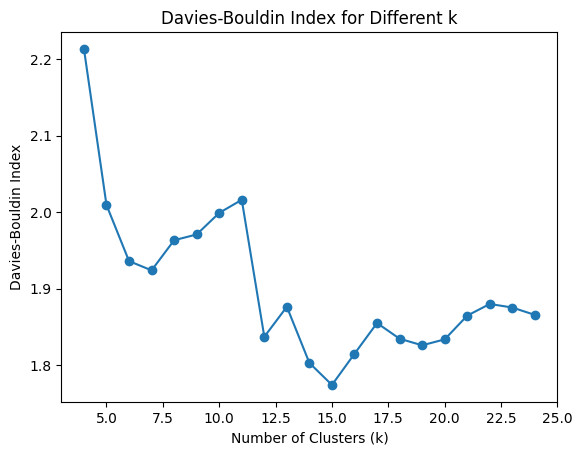

In [15]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

scores = []
for k in range(4, 25):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data)
    score = davies_bouldin_score(final_data, kmeans.labels_)
    scores.append(score)

plt.plot(range(4, 25), scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Different k')
plt.show()


7 clusters has the first minimum point

In [16]:
model = KMeans(n_clusters=7, random_state=42)
model.fit(final_data)
clusters = model.predict(final_data)

using kmeans clustering and cosine distance to get recommendations

In [23]:
from scipy.spatial.distance import cdist

def recommend(songs):
    # get the indices of the songs
    indices = []
    for song in songs:
        idx = song_details[song_details['name'] == song].index[0]
        indices.append(idx)
    
    # get the features of the songs 
    features = final_data.iloc[indices]

    # get clusters of the input songs
    input_clusters = model.predict(features)

    num_clusters = len(set(input_clusters))
    num_nearest = (int) (12 / num_clusters)

    # get the closest songs
    closest_songs = []
    for i, cluster in enumerate(input_clusters):
        # Find all songs in the same cluster
        cluster_indices = np.where(clusters == cluster)[0]
        cluster_songs = final_data.iloc[cluster_indices]
    
        # Calculate distances between the input song and songs in the same cluster
        distances = cdist([features.iloc[i]], cluster_songs, metric='cosine')
    
        # Sort songs by distance (ascending) and select the closest ones
        closest_indices = cluster_indices[np.argsort(distances[0])][: num_nearest]  # Top closest songs
        closest_songs.extend(closest_indices)
        
    recommended_songs = song_details.iloc[list(set(closest_songs))]
    
    # dont take the songs that were given as input
    recommended_songs = recommended_songs[~recommended_songs['name'].isin(songs)]

    return recommended_songs

In [24]:
# inputs = ["Die With A Smile", "Espresso", 'Raataan Lambiyan (From "Shershaah")']
inputs = ["Die With A Smile", "Espresso", "cardigan", 'Raataan Lambiyan (From "Shershaah")', 'Khairiyat']
# inputs = ["Espresso", 'Raataan Lambiyan (From "Shershaah")']
recommend(inputs)


,name,artist,release_year,id,genre
2,BIRDS OF A FEATHER,Billie Eilish,2024,6dOtVTDdiauQNBQEDOtlAB,"gaming, pop"
3,"Good Luck, Babe!",Chappell Roan,2024,0WbMK4wrZ1wFSty9F7FCgu,"gaming, pop"
9,Who,Jimin,2024,7tI8dRuH2Yc6RuoTjxo4dU,pop
10,Bed Chem,Sabrina Carpenter,2024,1UHS8Rf6h5Ar3CDWRd3wjF,pop
778,Pink + White,Frank Ocean,2016,3xKsf9qdS1CyvXSMEid6g8,r&b
15,Q U E V A S H A C E R H O Y ?,"Omar Courtz, De La Rose",2024,0Sr7ssScx54yxdM2ols7nW,"latin, pop"
401,Stick Season,Noah Kahan,2022,0mflMxspEfB0VbI1kyLiAv,"folk, pop"
274,タイムパラドックス,Vaundy,2024,3jNwPOqdPvQIr5dRT0hzgY,j-pop
542,"Ranjha (From ""Shershaah"")","Jasleen Royal, B Praak, Romy, Anvita Dutt",2021,72zHuDxFQTjbL51qJQSA7j,indian
38,A Bar Song (Tipsy),Shaboozey,2024,2FQrifJ1N335Ljm3TjTVVf,"gaming, pop"


In [20]:
song_details.to_csv("datasets/song_details.csv", index=False)
final_data.to_csv("datasets/songs_features.csv", index=False)